## Capstone Project 1: Predicting Success in Kickstarter Campaigns

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Kickstarter is a funding platform for creative projects. When creative groups, companies, or individuals have an idea, a clear plan and a final funding goal, they can submit their projects to the Kickstarter platform in order to garner public support and funding. The Kickstarter platform provides a space where where campaigns can both ask for funding donations, and provide incentives and rewards to those who pledge funds to the project.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Kickstarter platform is funded by fees collected from each donation, and from the overall funding amount when a campaign is successful. Kickstarter applies a 5% fee to any successful campaigns, and collects a 3-5% payment processing fee per donation, depending on the donation amount. If a campaign is not successful and does not reach their funding goal, Kickstarter does not collect the standard 5% fee. Therefore, in order for Kickstarter to continue their success, and increase their profits, they must host successful campaigns that reach or exceed their funding goal. Currently, successful Kickstarter campaigns are estimated at 35% of total campaigns, while failed campaigns are closer to 52%.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;An analysis of successful Kickstarter campaigns will address metrics for campaigns that reach and exceed their funding goals. This includes the category of campaign, rewards/incentives offered, funding goal, funding time frame, and campaign description.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The ability to predict a successful Kickstarter campaign will be of great benefit to both Kickstarter as a company, and to companies and creators who launch campaigns on their website. Kickstarter has an inherent intrerest in running successful campaigns because of their fee structure, and their overall profits as a company. Additionally, competition from other crowdfunding platforms are gaining popularity and Kickstarter will need remain competitive in offering services and exposure to clients that will lead to succesful campaign outcomes.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Companies and creators who are launching campaigns also have an inherent interest in understanding the factors that create a successful campaign. Having a campaign or project reach or exceed funding status could alter the trajectory of a product or idea. Alternatively, campaigns and projects that end up failing to meet their funding goals could end up on life support.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By analyzing trends in successful campaigns, Kickstarter will be able to determine which campaigns are more likely to reach or exceed funded status. Armed with this data insight, Kickstarter will be able to make data driven, impactful decisions in regards to
    - Services offered to clients
    - Fees that are collected from clients and from contributors, 
    - Campaign guidelines and recommendations


### 5.4 Data Wrangling

The dataset that was used for analysis was provided in one .csv file, obtained from [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv). At first glance, the data is fairly clean containing 15 columns with 378,661 rows of data. Each Kickstarter campaign is represented by one row of data including the campaign name, the main category that the campaign falls under, the currency type that pledges are converted to, the campaign deadline, funding goal, the state of the campaign, how many backers supported the campaign, what country the campaign originated from, and then two columns that are conversions of the pledged amount column converted to USD. 

To start off the data cleaning process, Python packages that will be utilized are imported and the data is read into a pandas data frame. The packages that I believe will be the most useful in the cleaning process are pandas and numPy. 

##### Basic Data Exploration

In [2]:
#import packages
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats.stats import pearsonr
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from numpy.random import seed
from scipy.stats import t
from scipy.stats import ttest_ind
from wordcloud import WordCloud, STOPWORDS
from six.moves import range
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
#read in csv
df = pd.read_csv(r'/Users/kellipeluso/Desktop/Springboard/ks-projects-201801.csv', encoding = 'latin')

I began the cleaning process by determining whether any data was duplicated. Each Kickstarter campaign is assigned a campaign ID, and I proceeded to work on deduplication based off of this column. In order to check for duplicate rows, I created a new data frame that would contain any potential duplicates. I created this data frame using df.duplicated() and then printing the shape of the new data frame. There were no duplicate rows that needed to be removed in the original data frame.

In [4]:
#check out df shape
df.shape

(378661, 15)

In [5]:
#check for any duplicate rows/campaigns
duplicate_rows_df = df[df.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


##### Dataframe Cleaning

In [117]:
#Take a look at the dataset
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_goal_real,state_encode,main_category_encode,goal_binned,pledge_binned,name_cl,name_length,name_len,backers_binned,campaign_duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,...,1533.95,1,12,"(1500.0, 2500.0]","(-0.001, 11.0]",31,6,6,"(-0.001, 1.0]",59 days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,...,30000.00,1,6,"(20309.194, 46000.0]","(1420.0, 2920.0]",45,8,8,"(6.0, 24.0]",60 days
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,...,45000.00,1,6,"(20309.194, 46000.0]","(70.0, 235.0]",14,3,3,"(1.0, 6.0]",45 days
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,...,5000.00,1,10,"(4000.0, 5500.0]","(-0.001, 11.0]",49,7,7,"(-0.001, 1.0]",30 days
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,...,19500.00,0,6,"(12500.0, 20309.194]","(628.0, 1420.0]",58,8,8,"(6.0, 24.0]",56 days


In [16]:
#examine column names
print ("column names: ", df.columns.values)

column names:  ['ID' 'name' 'category' 'main_category' 'currency' 'deadline' 'goal'
 'launched' 'pledged' 'state' 'backers' 'country' 'usd pledged'
 'usd_pledged_real' 'usd_goal_real' 'state_encode']


In [17]:
#check for columns with null values
df.isnull().sum()

ID                    0
name                  4
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         234
usd_pledged_real      0
usd_goal_real         0
state_encode          0
dtype: int64

#### <i>Add Columns</i>

In [65]:
#number of characters in campaign name
df['name_cl'] = [len(str(i).strip(' ')) for i in df.name]
df.name_cl.head()

0    31
1    45
2    14
3    49
4    58
Name: name_cl, dtype: int64

In [67]:
#number of words in campaign name
df['name_len'] = [len(str(i).split()) for i in df.name]
df.name_len.head()

0    6
1    8
2    3
3    7
4    8
Name: name_len, dtype: int64

In [118]:
#encode categorical data from main_category column for future stats analysis
df["main_category"] = df["main_category"].astype('category')
df["main_category_encode"] = df["main_category"].cat.codes

In [85]:
#encode the remaining campaign states
df["state"] = df["state"].astype('category')
df["state_encode"] = df["state"].cat.codes
df["state_encode"].value_counts()

1    197719
2    133956
0     38779
3      1846
Name: state_encode, dtype: int64

In [86]:
#bin backers
df['backers_binned'] = pd.qcut(df['backers'], q=5, duplicates = 'drop')
df['backers_binned'].value_counts()

(-0.001, 1.0]       86029
(77.0, 219382.0]    73867
(24.0, 77.0]        72976
(6.0, 24.0]         70822
(1.0, 6.0]          68606
Name: backers_binned, dtype: int64

In [87]:
#bin the data for usd_goal_real
df['goal_binned'] = pd.qcut(df['usd_goal_real'], q=10, duplicates = 'drop')
df['goal_binned'].value_counts()

(700.0, 1500.0]                  40586
(2500.0, 4000.0]                 38152
(0.009000000000000001, 700.0]    37648
(5500.0, 9000.0]                 37373
(20309.194, 46000.0]             37262
(46000.0, 166361390.71]          37198
(12500.0, 20309.194]             36977
(4000.0, 5500.0]                 36792
(9000.0, 12500.0]                35876
(1500.0, 2500.0]                 34436
Name: goal_binned, dtype: int64

In [88]:
#bin the data for usd_pledged_real
df['pledge_binned'] = pd.qcut(df['usd_pledged_real'], q=10, duplicates = 'drop')
df['pledge_binned'].value_counts()

(-0.001, 11.0]            75159
(70.0, 235.0]             37280
(628.0, 1420.0]           37250
(2920.0, 5710.0]          37231
(13928.0, 20338986.27]    37228
(5710.0, 13928.0]         37222
(1420.0, 2920.0]          37198
(235.0, 628.0]            37154
(11.0, 70.0]              36578
Name: pledge_binned, dtype: int64

In [103]:
#add column for campaign duration
df['launched'] = pd.to_datetime(df['launched']).dt.date
df['deadline'] = pd.to_datetime(df['deadline']).dt.date
df['campaign_duration'] = df['deadline'] - df['launched']

#### <i>Drop Columns/Remove Data</i>

In [104]:
#we cannot determine a state of live or undefined campaigns, we will remove these campaigns from the analysis
#drops a total of 6361 rows
df = df[df.state != 'live']
df = df[df.state != 'undefined']

In [105]:
#drop usd pledged column
clean_df = df.drop('usd pledged', axis = 1)
clean_df = clean_df.drop('name_length', axis = 1)

In [106]:
#re-examine column names after usd pledged is dropped and binary is added 
print ("column names: ", clean_df.columns.values)

column names:  ['ID' 'name' 'category' 'main_category' 'currency' 'deadline' 'goal'
 'launched' 'pledged' 'state' 'backers' 'country' 'usd_pledged_real'
 'usd_goal_real' 'state_encode' 'main_category_encode' 'goal_binned'
 'pledge_binned' 'name_cl' 'name_len' 'backers_binned' 'campaign_duration']


In [107]:
#examine shape of new cleaned dataset
clean_df.shape

(372300, 22)

##### Clean Dataframe Exploration

In [108]:
clean_df.describe()

,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real,state_encode,main_category_encode,name_cl,name_len,campaign_duration
count,3.723000e+05,3.723000e+05,3.723000e+05,372300.000000,3.723000e+05,3.723000e+05,372300.000000,372300.000000,372300.000000,372300.000000,372300
mean,1.074559e+09,4.930011e+04,9.758305e+03,106.910040,9.148405e+03,4.572162e+04,1.265563,7.496025,34.913666,5.683137,34 days 10:57:14.185334
std,6.191804e+08,1.182202e+06,9.634080e+04,914.235813,9.170345e+04,1.151326e+06,0.642867,3.914008,15.970032,2.751654,66 days 10:46:18.866535
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02,0.000000,0.000000,1.000000,1.000000,1 days 00:00:00
25%,5.378147e+08,2.000000e+03,3.100000e+01,2.000000,3.122000e+01,2.000000e+03,1.000000,5.000000,21.000000,3.000000,30 days 00:00:00
50%,1.075219e+09,5.500000e+03,6.250000e+02,12.000000,6.280000e+02,5.500000e+03,1.000000,7.000000,34.000000,5.000000,30 days 00:00:00
75%,1.610127e+09,1.650000e+04,4.092000e+03,57.000000,4.066000e+03,1.598542e+04,2.000000,10.000000,49.000000,8.000000,37 days 00:00:00
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08,3.000000,14.000000,99.000000,29.000000,16739 days 00:00:00


In [109]:
#examine the first 10 rows of the dataset
clean_df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_pledged_real,usd_goal_real,state_encode,main_category_encode,goal_binned,pledge_binned,name_cl,name_len,backers_binned,campaign_duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.00,failed,...,0.00,1533.95,1,12,"(1500.0, 2500.0]","(-0.001, 11.0]",31,6,"(-0.001, 1.0]",59 days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.00,failed,...,2421.00,30000.00,1,6,"(20309.194, 46000.0]","(1420.0, 2920.0]",45,8,"(6.0, 24.0]",60 days
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.00,failed,...,220.00,45000.00,1,6,"(20309.194, 46000.0]","(70.0, 235.0]",14,3,"(1.0, 6.0]",45 days
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.00,failed,...,1.00,5000.00,1,10,"(4000.0, 5500.0]","(-0.001, 11.0]",49,7,"(-0.001, 1.0]",30 days
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.00,canceled,...,1283.00,19500.00,0,6,"(12500.0, 20309.194]","(628.0, 1420.0]",58,8,"(6.0, 24.0]",56 days
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.00,successful,...,52375.00,50000.00,2,7,"(46000.0, 166361390.71]","(13928.0, 20338986.27]",20,3,"(77.0, 219382.0]",35 days
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01,1205.00,successful,...,1205.00,1000.00,2,7,"(700.0, 1500.0]","(628.0, 1420.0]",60,8,"(6.0, 24.0]",20 days
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01,453.00,failed,...,453.00,25000.00,1,7,"(20309.194, 46000.0]","(235.0, 628.0]",49,8,"(24.0, 77.0]",45 days
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24,8233.00,canceled,...,8233.00,125000.00,0,4,"(46000.0, 166361390.71]","(5710.0, 13928.0]",53,8,"(24.0, 77.0]",35 days
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11,6240.57,canceled,...,6240.57,65000.00,0,6,"(46000.0, 166361390.71]","(5710.0, 13928.0]",57,10,"(24.0, 77.0]",30 days


In [110]:
#examine information about column datatypes
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372300 entries, 0 to 378660
Data columns (total 22 columns):
ID                      372300 non-null int64
name                    372296 non-null object
category                372300 non-null object
main_category           372300 non-null category
currency                372300 non-null object
deadline                372300 non-null object
goal                    372300 non-null float64
launched                372300 non-null object
pledged                 372300 non-null float64
state                   372300 non-null category
backers                 372300 non-null int64
country                 372300 non-null object
usd_pledged_real        372300 non-null float64
usd_goal_real           372300 non-null float64
state_encode            372300 non-null int8
main_category_encode    372300 non-null int8
goal_binned             372300 non-null category
pledge_binned           372300 non-null category
name_cl                 372300 non-nu

Most of our columns are objects, and would not have an outlier associated with them. In order to identify outliers in the appropriate columns (goal, pledged, usd_pledged_real, usd_goal_real) the datatypes are examined once again in order to remove the object columns. After object columns are removed there are only 6 columns left. From these 6 columns, a zscore over 3 is calculated, and any outliers identified are rejected. After the outliers are rejected, the data frame is left with 375,784 rows in comparison to the original 378,661. This will be helpful to take into account when statistical analysis is completed.

##### Identify Outliers

In [111]:
#identify outliers
print ("data types: \n", clean_df.dtypes)
print ("shape before :", clean_df.shape)
clean_df_num = clean_df.select_dtypes(exclude=['object'])
print ("shape after excluding object columns: ", clean_df_num.shape)

data types: 
 ID                                int64
name                             object
category                         object
main_category                  category
currency                         object
deadline                         object
goal                            float64
launched                         object
pledged                         float64
state                          category
backers                           int64
country                          object
usd_pledged_real                float64
usd_goal_real                   float64
state_encode                       int8
main_category_encode               int8
goal_binned                    category
pledge_binned                  category
name_cl                           int64
name_len                          int64
backers_binned                 category
campaign_duration       timedelta64[ns]
dtype: object
shape before : (372300, 22)
shape after excluding object columns:  (372300, 16)


It is important to identify outliers in order to account for possible statistical errors in the future. Outliers can skew statistical measures such as means and medians, and will need to be further considered when designing the predictive model. For data exploration purposes, the outliers continue to remain in the dataset at this time.

## 7.2 Data Storytelling

### Campaign Success & Failure: Descriptive Stats

The majority of Kickstarter campaigns end either in failure, or in success. Suprisingly, more Kickstarter campaigns fail than succeed. 197,719 Kickstarter campaigns failed, while 133,956 Kickstarter campaigns succeeded. Now that we've taken a broad look at the state of all Kickstarter campaigns within this dataset, we can zero in on attributes of successful campaigns.

In [95]:
clean_df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
suspended       1846
Name: state, dtype: int64

In [96]:
#campaign duration column
clean_df['launched'] = pd.to_datetime(clean_df['launched']).dt.date
clean_df['deadline'] = pd.to_datetime(clean_df['deadline']).dt.date
clean_df['campaign_duration'] = clean_df['deadline'] - clean_df['launched']

#successful campaign descriptive stats
success = clean_df['state'] == 'successful'
total = clean_df['usd_pledged_real'] >= 0
success_df = clean_df[success & total]

#compare this to the overall backers stats
back_avg = success_df['backers'].mean()
back_min = success_df['backers'].min()
back_max = success_df['backers'].max()

#compare this to the overall campaign duration stats
duration_min = success_df['campaign_duration'].min()
duration_max = success_df['campaign_duration'].max()
duration_mean = success_df['campaign_duration'].mean()

success_min = success_df['usd_pledged_real'].min()
success_max = success_df['usd_pledged_real'].max()
success_mean = success_df['usd_pledged_real'].mean()

print(back_min)
print(back_max)
print(back_avg)

print(success_min)
print(success_max)
print(success_mean)
pd.options.mode.chained_assignment = None

success_df.sort_values(by=['usd_pledged_real'],ascending=False).head(10)
success_df.shape

success_df['main_category'].value_counts()

0
219382
263.92136223834694
0.79
20338986.27
22670.795231195676


Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11510
Design          10550
Theater          6534
Technology       6434
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64

In [97]:
#successful campaign descriptive stats
success_df.state.describe()

count         133956
unique             1
top       successful
freq          133956
Name: state, dtype: object

In [98]:
#failed campaign descriptive stats
failed = clean_df['state'] == 'failed'
total2 = clean_df['usd_pledged_real'] >= 0
fail_df = clean_df[failed & total2]

#compare this to the overall backers stats
fback_avg = fail_df['backers'].mean()
fback_min = fail_df['backers'].min()
fback_max = fail_df['backers'].max()

#compare this to the overall campaign duration stats
fduration_min = fail_df['campaign_duration'].min()
fduration_max = fail_df['campaign_duration'].max()
fduration_mean = fail_df['campaign_duration'].mean()

fail_min = fail_df['usd_pledged_real'].min()
fail_max = fail_df['usd_pledged_real'].max()
fail_mean = fail_df['usd_pledged_real'].mean()

print(fback_min)
print(fback_max)
print(fback_avg)

print(fail_min)
print(fail_max)
print(fail_mean)
pd.options.mode.chained_assignment = None

fail_df.sort_values(by=['usd_pledged_real'],ascending=False).head(10)
fail_df.shape

fail_df['main_category'].value_counts()

0
6550
16.422351923689682
0.0
757352.94
1320.6038167803883


Film & Video    32904
Publishing      23145
Music           21752
Technology      20616
Games           16003
Food            15969
Design          14814
Fashion         14182
Art             14131
Photography      6384
Crafts           5703
Comics           4036
Theater          3708
Journalism       3137
Dance            1235
Name: main_category, dtype: int64

In [99]:
#failed campaign descriptive stats
fail_df.state.describe()

count     197719
unique         1
top       failed
freq      197719
Name: state, dtype: object

To further analyze attributes of a successful Kickstarter campaign, success_df and fail_df are created to house all successful or failed campaigns based off of the state column. An examination of successful campaigns reveals the following. Successful Kickstarter campaigns have:
 - An average of 263 backers per campaign
 - Run for an average campaign duration of 31 days
 - Have raised an average of 22670 per campaign

The most successful Kickstarter campaign within this dataset is for <b>Pebble Time - Awesome Smartwatch, No Compromises</b>. Back in 2012, Pebble also had the highest grossing campaign in Kickstarter history with their first project - which ended up being the very first smart watch. <b>Pebble Time - Awesome Smartwatch, No Compromises</b> raised \\$20,338,986. in only 31 days, with 78471 backers. The original campaign goal was \\$500,000. It's very inspiring to see that a company with multiple top campaigns was able to create a technology gadget that so many people now use on a daily basis. From additional research, it seems as though Pebble was able to set the ground work for the tech industry's creation of smart watches - a field now dominated by brands like Apple and Samsung.

### Campaign Names

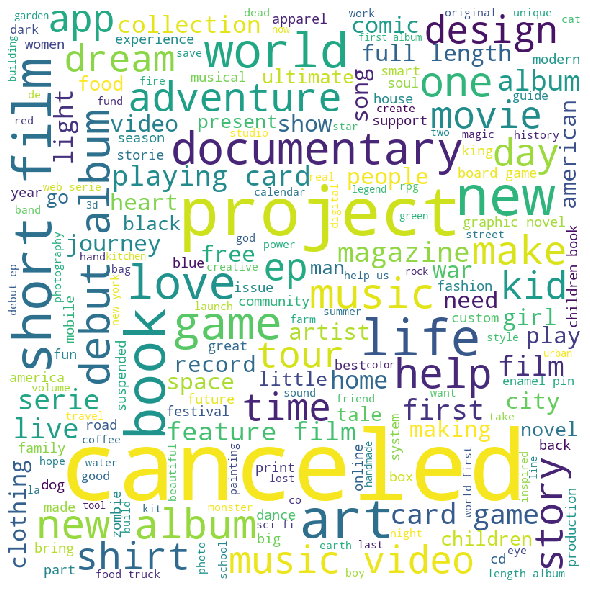

In [100]:
#generate word cloud for all campaigns
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.name: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()
  

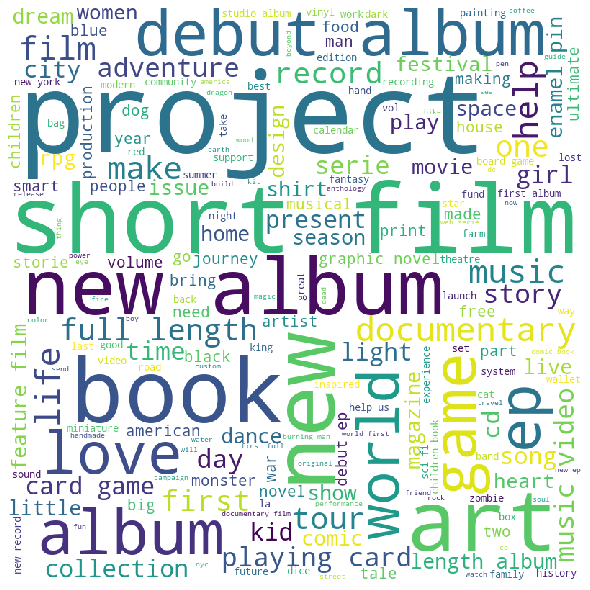

In [101]:
#wordcloud for successful campaigns
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in success_df.name: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  

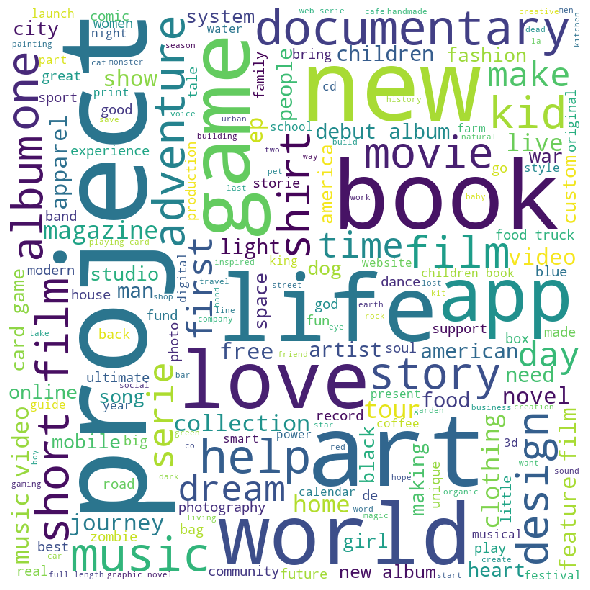

In [102]:
#wordcloud for failed campaigns
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in fail_df.name: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  

Many of the same words appear in word clouds for both successful campaigns and failed campaigns. It doesn't seem like there any particular words that will possibly predict success. Maybe shorter, concise titles help to predict success?

In [ ]:
#name length analysis


### Main Categories

As previously stated, the ability to predict a successful Kickstarter campaign will be of huge benefit to both Kickstarter and to companies and groups who use their services to raise funds for their projects. The success of Kickstarter campaigns means continued success and profitability for the Kickstarter platform, and successful campaigns are given the opportunity to launch their innovative products and ideas - which at times maybe didn't seem possible through traditional funding. It's important to begin looking at any potential relationships between the characteristics of successful campaigns and unsuccessful campaigns. What differentiates them? Is it enough to just put a project on Kickstarter and see what happens, or are there outside factors that need to be taken into account or at least discussed? 

In [30]:
#Identify the top ten main campaign categories 
clean_df['main_category'].value_counts().head(30)

Film & Video    62399
Music           49403
Publishing      39113
Games           34943
Technology      32189
Design          29763
Art             27959
Food            24418
Fashion         22563
Theater         10871
Comics          10743
Photography     10730
Crafts           8733
Journalism       4724
Dance            3749
Name: main_category, dtype: int64

Visually, this chart represents what we know to be true about the data at first glance. This ranking is based off of the number of campaigns in each category. The top 10 main categories do not increase drastically between Fashion and Games, however there is an identified steep increase from Theater to Fashion, and from Publishing to both Music and Film & Video. The top ten main categories are calculated from the sum of campaigns that fall under each category.

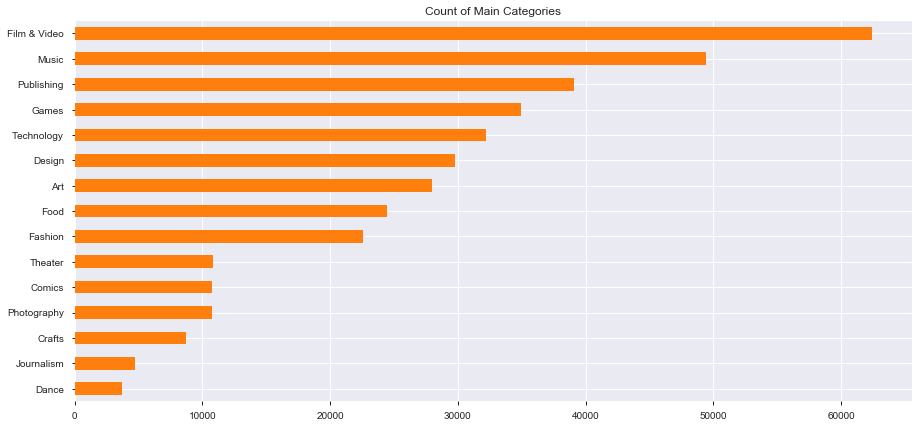

In [31]:
#Visualize the top ten main kickstarter campaign categories, based on count of campaigns in each category
clean_df.main_category.value_counts()[:30].sort_values().plot(kind='barh', title='Count of Main Categories', color = 'tab:orange',figsize=(15, 7))

Intrestingly, when we look at the top 10 main categories based on the sum of pledged USD, the data provides interesting insight. Although games are the 4th ranked main category in terms of number of campaigns, it far out paces Film & Video. Campaigns with the main category games brought in \\$741,321,067 in pledges alone from 35,231 campaigns. For Kickstarter, this accounts to a \\$37,066,053.35 profit from the successful Game campaigns, not accounting for additional fees collected at the time of each pledge - that's a lot of money! 
Design is not far behind Games, bringing in \\$734,215,606 in pledges for 30,070 games.
This seems to be related to the amount of money needed to fund campaigns for categories such as Games and Technology.

In [32]:
clean_df.usd_pledged_real = clean_df.usd_pledged_real.astype(int)
usd_main = clean_df.groupby('main_category')['usd_pledged_real'].sum().sort_values(ascending = False)
print(usd_main)

main_category
Games           739853563
Design          728603021
Technology      683918915
Film & Video    389429074
Music           193328333
Publishing      132765904
Fashion         129773817
Food            125160859
Art              90213671
Comics           71335781
Theater          43583571
Photography      38275674
Crafts           14323985
Dance            12997480
Journalism       12343319
Name: usd_pledged_real, dtype: int64


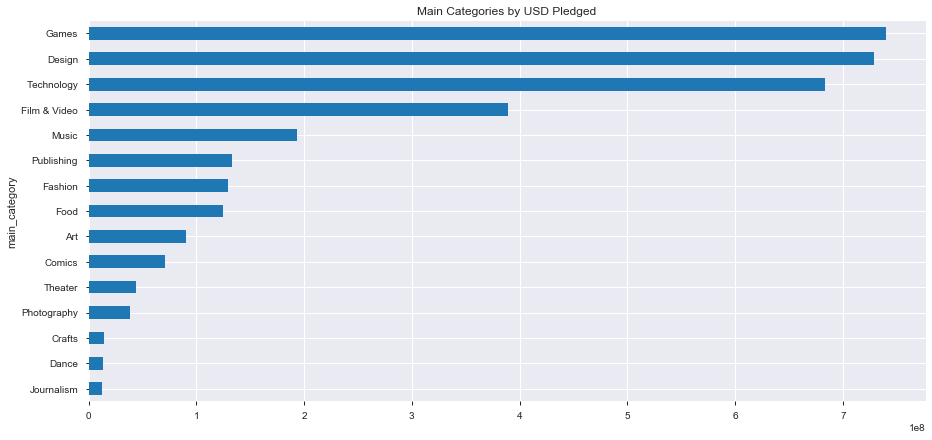

In [33]:
#top 10 campaign categories by total sum of money pledged
clean_df.usd_pledged_real = clean_df.usd_pledged_real.astype(int)
clean_df.groupby('main_category')['usd_pledged_real'].sum().sort_values(ascending = True).plot(kind='barh', title='Main Categories by USD Pledged', color = 'tab:blue',figsize=(15, 7))

It is not surprising to see that for each category, successful campaigns were the most lucrative. Failed campaigns appear to be the second most lucrative campaign state, while live, suspended and undefined have the lowest pledge amounts.

In [34]:
#top 10 campaign categories by total sum of money pledged for each campaign state
clean_df.usd_pledged_real = clean_df.usd_pledged_real.astype(int)
camp_df = clean_df.groupby(['main_category','state'])['usd_pledged_real'].sum().sort_index(ascending = False).reset_index()
camp_df

,main_category,state,usd_pledged_real
0,Theater,suspended,1195
1,Theater,successful,39027485
2,Theater,failed,3633313
3,Theater,canceled,921578
4,Technology,suspended,10936687
5,Technology,successful,598912415
6,Technology,failed,49653716
7,Technology,canceled,24416097
8,Publishing,suspended,74069
9,Publishing,successful,116072212


After determining breaking down the main categories by the campaign state, we were able to find both the pledge amount by campaign state in each main category (as shown above), and the total number of campaigns by state in each main category. In the future, we will compare the success and failure rates of each campaign main category to help determine main categories at a higher financial risk.

In [35]:
# a look at the status of campaigns based on their main category
# do certain campaign categories have a higher failure rate than others?
main_state = clean_df.groupby('main_category')['state'].value_counts()
print(main_state)


main_category  state     
Art            failed        14131
               successful    11510
               canceled       2222
               suspended        96
Comics         successful     5842
               failed         4036
               canceled        842
               suspended        23
Crafts         failed         5703
               successful     2115
               canceled        843
               suspended        72
Dance          successful     2338
               failed         1235
               canceled        163
               suspended        13
Design         failed        14814
               successful    10550
               canceled       4152
               suspended       247
Fashion        failed        14182
               successful     5593
               canceled       2650
               suspended       138
Film & Video   failed        32904
               successful    23623
               canceled       5755
               suspended     

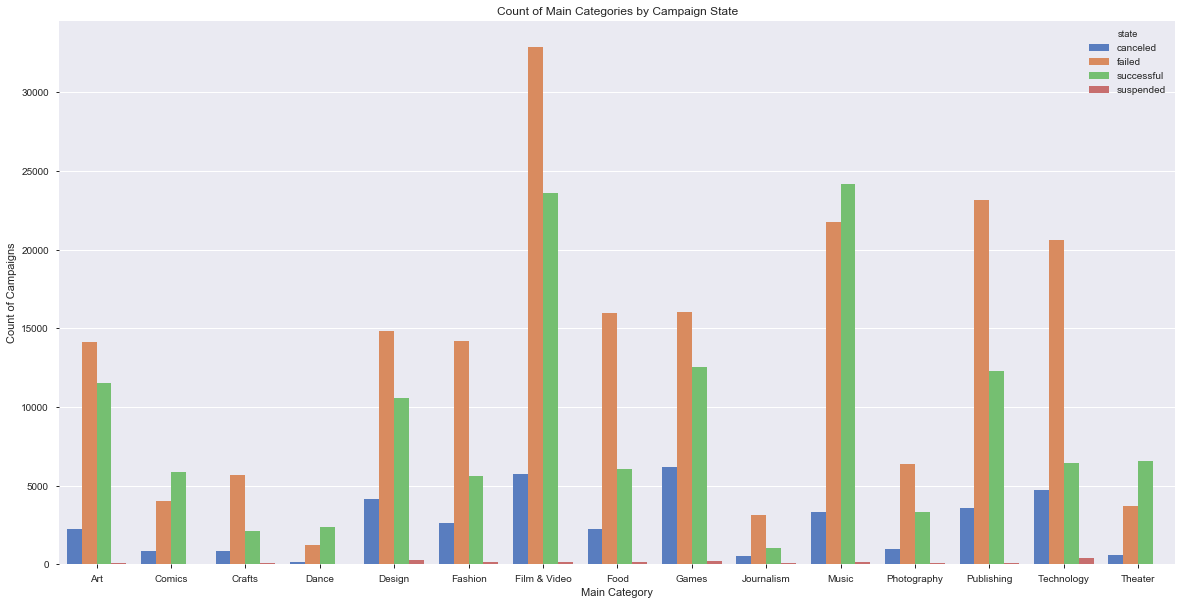

In [36]:
# visualization of count of campaign categories by campaign state
clean_df.usd_pledged_real = clean_df.usd_pledged_real.astype(int)
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='main_category', hue="state", data=clean_df, palette="muted", ax=ax)
plt.xlabel('Main Category')
plt.ylabel('Count of Campaigns')
plt.title('Count of Main Categories by Campaign State')
plt.show()


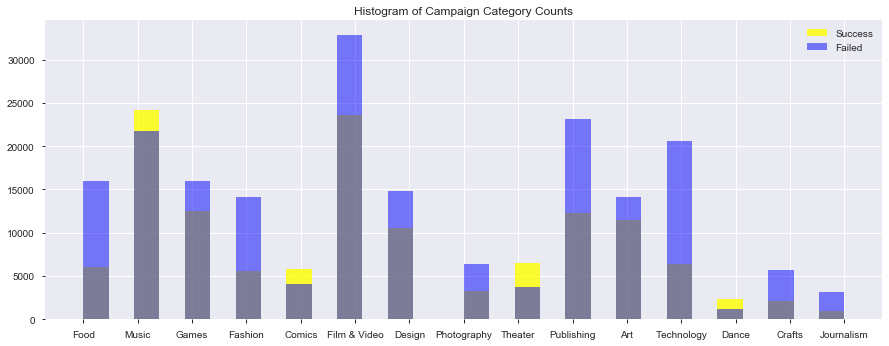

In [37]:
x = clean_df['main_category'].loc[clean_df['state'] == 'successful']
y = clean_df['main_category'].loc[clean_df['state'] == 'failed']
fig =plt.figure(figsize=(15,5.5))

plt.hist(x, bins = 30, alpha=0.8, label='Success', color = 'yellow')
plt.hist(y, bins = 30, alpha=0.5, label='Failed', color = 'blue')
plt.legend(loc='upper right')
plt.title('Histogram of Campaign Category Counts')
plt.show()

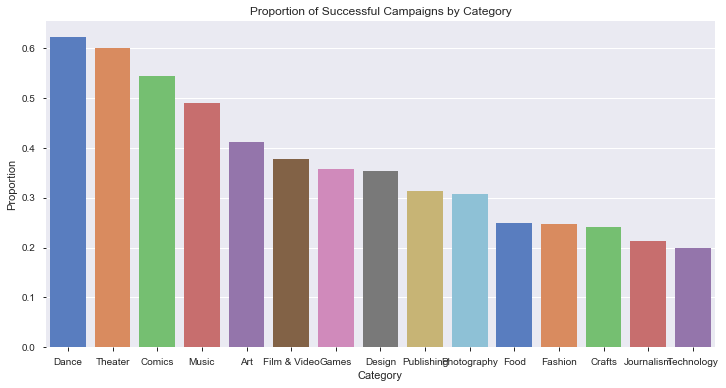

Dance           0.623633
Theater         0.601049
Comics          0.543796
Music           0.489788
Art             0.411674
Film & Video    0.378580
Games           0.358241
Design          0.354467
Publishing      0.314473
Photography     0.308015
Food            0.249201
Fashion         0.247884
Crafts          0.242185
Journalism      0.214225
Technology      0.199882
Name: main_category, dtype: float64


In [38]:
#what portion of campaigns in each country were successful?
y = (clean_df['main_category'].loc[clean_df['state'] == 'successful'].value_counts())/(clean_df['main_category'].value_counts())
y = y.sort_values(ascending = False)
fig=plt.figure(figsize=(12,6))
ax = sns.barplot(x = y.index, y = y, order = y.index, palette = 'muted')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.title('Proportion of Successful Campaigns by Category')
plt.show()
print(y)

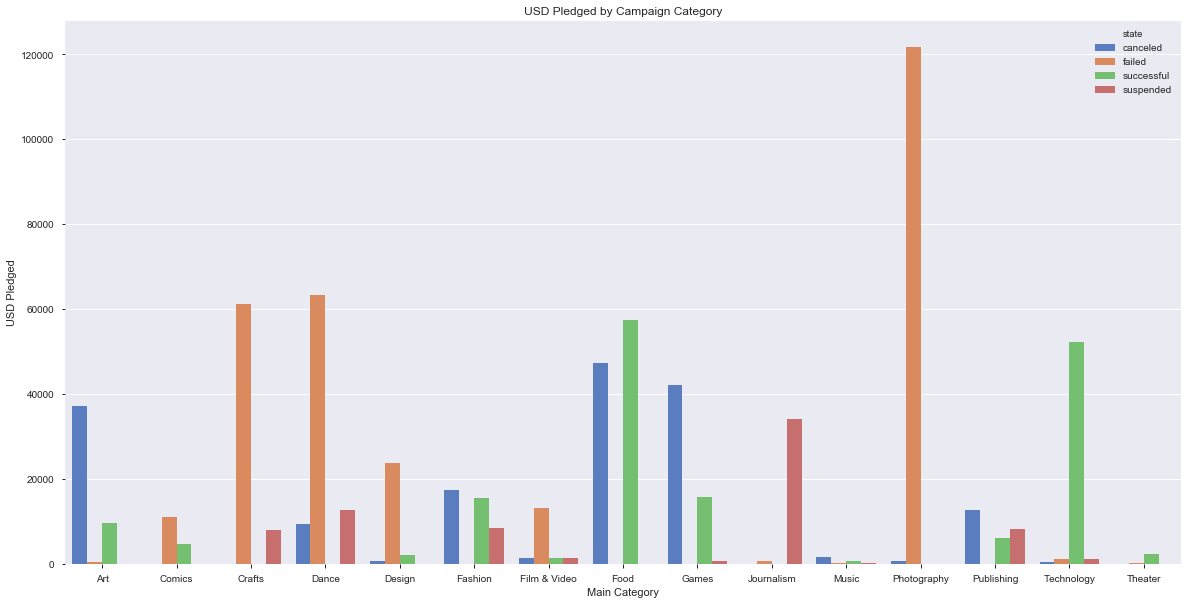

In [39]:
# visualization of the main categories with their total pledged USD by the campaign state
camp_df.usd_pledged_real = clean_df.usd_pledged_real.astype(int)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='main_category', y="usd_pledged_real", hue="state", data=camp_df, palette="muted", ax=ax)
plt.xlabel('Main Category')
plt.ylabel('USD Pledged')
plt.title('USD Pledged by Campaign Category')
plt.show()

#### Research Question, Hypothesis and Statistics

<b>Research Question 1:</b> Is there a relationship between the campaign category and the success of a campaign?
<p>
<b>Hypothesis 1:</b> There is a statistically significant relationship between campaign category and the success of a campaign

The two variables being investigated are both categorical. Because of this, we use a two way table and stacked chart to determine whether there is any significant relationship between campaign category and campaign success.

In [91]:
test = clean_df.groupby(['main_category','state']).mean().sort_index(ascending = False).reset_index()
test.mean()

ID                      1.083387e+09
goal                    1.021519e+05
pledged                 7.899101e+03
backers                 8.254236e+01
usd_pledged_real        7.210151e+03
usd_goal_real           9.840421e+04
state_encode            1.500000e+00
main_category_encode    7.000000e+00
campaign_duration       3.402510e+15
goal_prop               2.215448e+00
dtype: float64

In [75]:
cat_state_table = pd.crosstab(index=clean_df["main_category"], 
                          columns=clean_df["state"])

cat_state_table

state,canceled,failed,successful,suspended
main_category,,,,
Art,2222,14131,11510,96
Comics,842,4036,5842,23
Crafts,843,5703,2115,72
Dance,163,1235,2338,13
Design,4152,14814,10550,247
Fashion,2650,14182,5593,138
Film & Video,5755,32904,23623,117
Food,2211,15969,6085,153
Games,6202,16003,12518,220


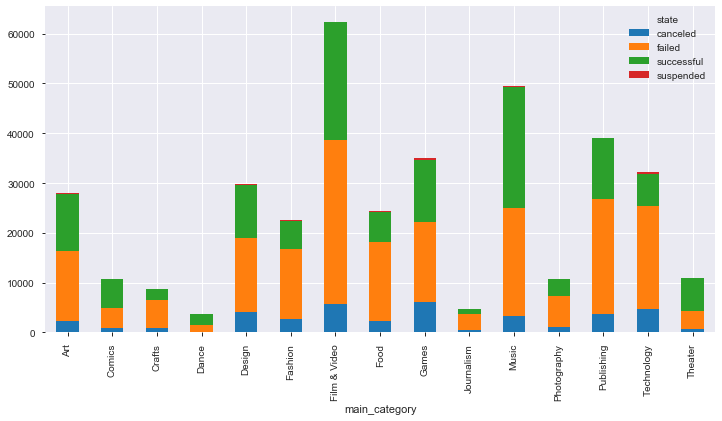

In [47]:
cat_state_table.plot(kind="bar", 
                 figsize=(12,6),
                 stacked=True)

In [116]:
### Statistical Normality Tests
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# generate univariate observations
data = clean_df['usd_pledged_real']
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.050, p=0.000
Sample does not look Gaussian (reject H0)


/Users/kellipeluso/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Campaign Goals

An overview of the Kickstarter campaign campaigns seek funding ranging anywhere from \\$0 to \\$20,000,000, however the average campaign goal is \\$49080. With conversions for different currencies already taken into account, total pledges for campaigns range anywhere from $0 to a high of \\$20,338,986. On average, campaigns end up raising \\$9058 total funding regardless of their eventual success or failure.


In [56]:
#explore the campaign goal data by identifying min/max/mean
goal_max = clean_df['goal'].max()
goal_min = clean_df['goal'].min()
goal_mean = clean_df['goal'].mean()
print('Campaign goal amounts range from $', goal_min, ' to $', goal_max,'.', 'The average campaign goal is $', goal_mean)
#explore the campaign goal data by identifying min/max/mean
pledge_max = clean_df['usd_pledged_real'].max()
pledge_min = clean_df['usd_pledged_real'].min()
pledge_mean = clean_df['usd_pledged_real'].mean()
print('Campaign pledge amounts range from $', pledge_min, ' to $', pledge_max,'.', 'The average pledge amount is $', pledge_mean)

Campaign goal amounts range from $ 0.01  to $ 100000000.0 . The average campaign goal is $ 49300.111864007515
Campaign pledge amounts range from $ 0  to $ 20338986 . The average pledge amount is $ 9148.286239591727


In [57]:
#create a new column to show the proportion of final campaign pledged to the original campaign goal
clean_df['goal_prop'] = clean_df['usd_pledged_real'] / clean_df['usd_goal_real']
clean_df.goal_prop.head()

0    0.000000
1    0.080700
2    0.004889
3    0.000200
4    0.065795
Name: goal_prop, dtype: float64

#### Research Question, Hypothesis and Statistics

<b>Research Question:</b> Are goals of failed campaigns typically higher than those of successful campaigns? Are initial campaign goals too lofty for the campaign content? Leading to a higher rate of failure?
<p>
<b>Hypothesis:</b> Goals of failed campaigns are higher on average than goals of succesful campaigns.

Use a box plot and Shapiro Wilks test to determine whether the data is normally distributed

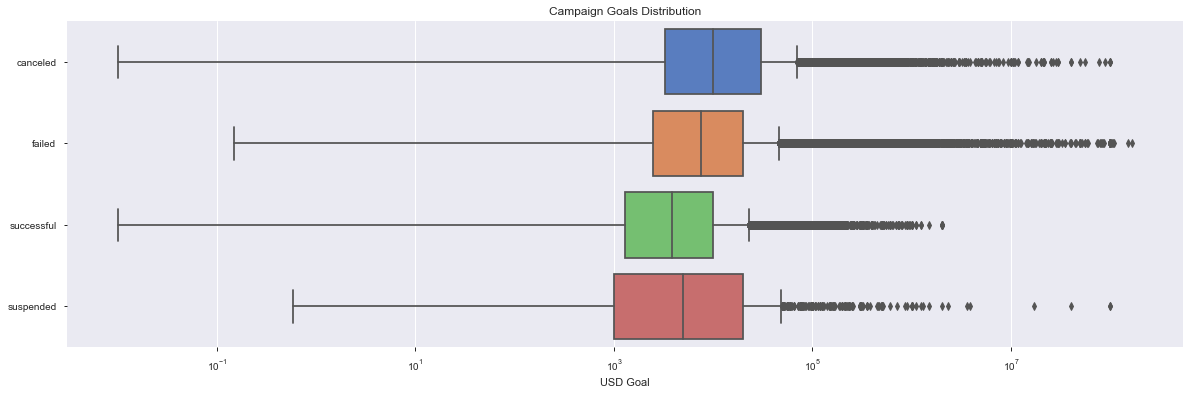

In [66]:
#distribution of campaign goals across all campaign states
f, ax = plt.subplots(figsize=(20, 6))
ax.set_xscale("log")
sns.boxplot(x="usd_goal_real", y = 'state', data=clean_df, palette = 'muted')
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel = "USD Goal", title = 'Campaign Goals Distribution')
plt.show()

In [67]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# generate univariate observations
data = clean_df['usd_goal_real']
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.011, p=0.000
Sample does not look Gaussian (reject H0)


/Users/kellipeluso/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Campaign Duration

After exploring some of the campaign data, it is important to add a column that shows the duration of a campaign to contextualize how much time it has taken for successful campaigns to reach or surpass their funding goal, or for determining the average length of time of a failed campaign. In order to create a campaign duration column, both the launched and deadline columns are converted to datetime. From there, the campaign_duration column is created and added to clean_df by calculating the difference between launched and deadline. 
Exploration of this new column shows that the minimum campaign duration is only 7 hours and 17 minutes, while the longest campaign duration was 16738 days. Campaigns typically run for an average length of time of 33 days.


In [112]:
#convert the launched date and deadline date to datetime, solve for the duration between the launch date and 
#deadline - drop the hr:mm:ss from the analysis
#sort for the top 10 campaign durations
#create a factorplot for campaign duration, state of campaign, and amount pledged
print(clean_df['campaign_duration'].head(10))
dur_min=clean_df['campaign_duration'].min()
dur_max=clean_df['campaign_duration'].max()
dur_mean=clean_df['campaign_duration'].mean()
print('The shortest campaign duration was',dur_min, ',',' the longest campaign duration was',dur_max,
      '.          The average campaign duration was ',dur_mean)

0   59 days
1   60 days
2   45 days
3   30 days
4   56 days
5   35 days
6   20 days
7   45 days
8   35 days
9   30 days
Name: campaign_duration, dtype: timedelta64[ns]
The shortest campaign duration was 1 days 00:00:00 ,  the longest campaign duration was 16739 days 00:00:00 .          The average campaign duration was  34 days 10:57:14.185334


In [113]:
#successful campaign duration
#redo datetime for success_df
success_df['launched'] = pd.to_datetime(success_df['launched']).dt.date
success_df['deadline'] = pd.to_datetime(success_df['deadline']).dt.date
success_df['campaign_duration'] = success_df['deadline'] - success_df['launched']
duration_min = success_df['campaign_duration'].min()
duration_max = success_df['campaign_duration'].max()
duration_mean = success_df['campaign_duration'].mean()
print(duration_min, duration_max, duration_mean)

1 days 00:00:00 92 days 00:00:00 32 days 03:45:17.011556


In [114]:
#failed campaign duration
#redo datetime for success_df
fail_df['launched'] = pd.to_datetime(fail_df['launched']).dt.date
fail_df['deadline'] = pd.to_datetime(fail_df['deadline']).dt.date
fail_df['campaign_duration'] = fail_df['deadline'] - fail_df['launched']
fduration_min = fail_df['campaign_duration'].min()
fduration_max = fail_df['campaign_duration'].max()
fduration_mean = fail_df['campaign_duration'].mean()
print(fduration_min, fduration_max, fduration_mean)

1 days 00:00:00 92 days 00:00:00 35 days 04:09:34.997850


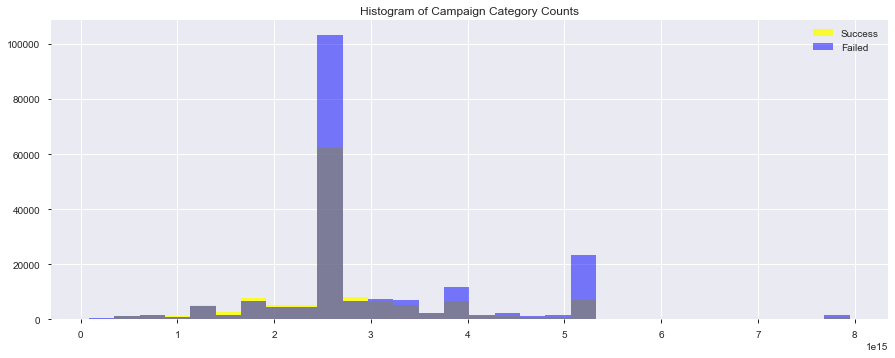

In [115]:
#campaign duration by campaign state
clean_df['campaign_duration'] = pd.to_numeric(clean_df['campaign_duration'], errors='coerce')
x = clean_df['campaign_duration'].loc[clean_df['state'] == 'successful']
y = clean_df['campaign_duration'].loc[clean_df['state'] == 'failed']
fig =plt.figure(figsize=(15,5.5))

plt.hist(x, bins = 30, alpha=0.8, label='Success', color = 'yellow')
plt.hist(y, bins = 30, alpha=0.5, label='Failed', color = 'blue')
plt.legend(loc='upper right')
plt.title('Histogram of Campaign Category Counts')
plt.show()

Text(0, 0.5, 'Total Funds Pledged by Campaign Main Category')

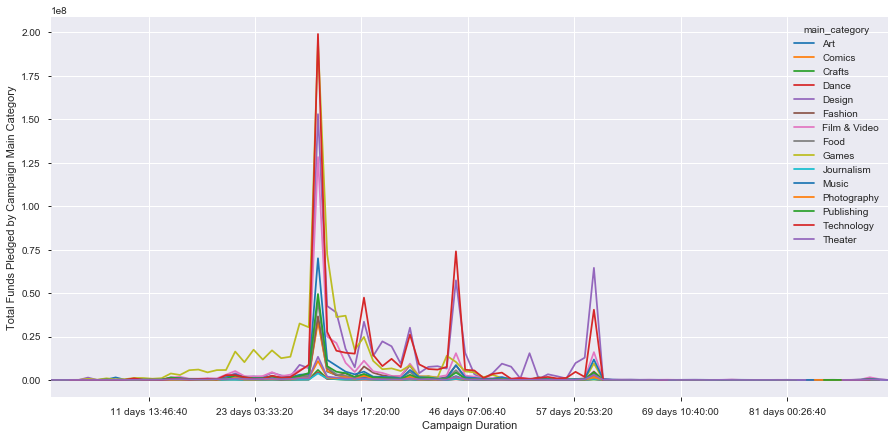

In [61]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
success_df.groupby(['campaign_duration','main_category']).sum()['usd_pledged_real'].unstack().plot(ax=ax)
plt.xlabel('Campaign Duration')
plt.ylabel('Total Funds Pledged by Campaign Main Category')


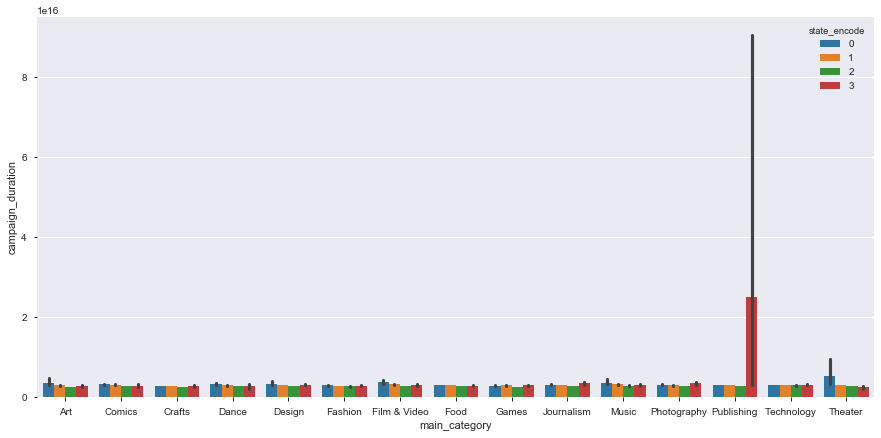

In [62]:
#a look at campaign duration by state (binary state, only fail and success)
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='main_category', y='campaign_duration', hue ="state_encode",  data = clean_df, ax=ax)

#### Research Question, Hypothesis and Statistics

<b>Research Question 1:</b>Is there a statistically significant relationship between the duration of a campaign and it's success?
<p>
<b>Hypothesis 1:</b> Longer campaigns are successful.

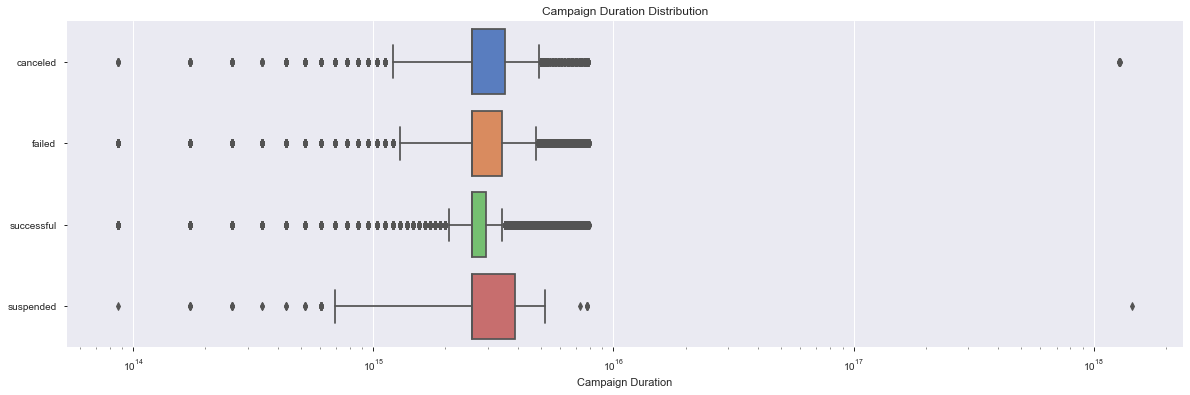

In [92]:
#distribution of campaign goals across all campaign states
f, ax = plt.subplots(figsize=(20, 6))
ax.set_xscale("log")
sns.boxplot(x="campaign_duration", y = 'state', data=clean_df, palette = 'muted')
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel = "Campaign Duration", title = 'Campaign Duration Distribution')
plt.show()

In [72]:
# generate univariate observations
data = clean_df['campaign_duration']
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.038, p=0.000
Sample does not look Gaussian (reject H0)


/Users/kellipeluso/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Campaign Countries of Origin

In [93]:
#count of successful campaigns per category
success_country = success_df['country'].value_counts()
print(success_country)

US      109299
GB       12067
CA        4134
AU        2010
DE         937
FR         908
NL         617
SE         509
ES         492
NZ         448
IT         439
MX         396
DK         360
HK         216
IE         207
CH         187
SG         178
NO         162
BE         152
AT         107
N,0"       105
LU          19
JP           7
Name: country, dtype: int64


In [94]:
#count of failed campaigns per country
fail_country = fail_df['country'].value_counts()
print(fail_country)

US      152061
GB       17387
CA        8236
AU        4606
DE        2499
IT        1930
NL        1794
FR        1612
ES        1381
MX        1015
SE        1000
NZ         826
DK         566
IE         476
CH         465
NO         420
AT         378
BE         371
SG         276
HK         261
N,0"       105
LU          38
JP          16
Name: country, dtype: int64


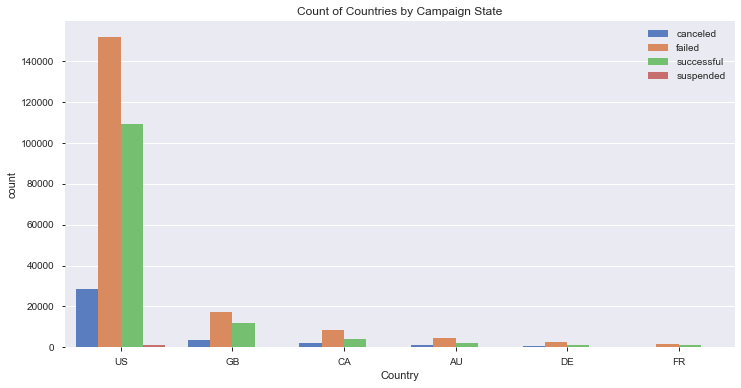

In [95]:
#count of campaigns by country and campaign state
fig = plt.figure(figsize = (12, 6))
sns.countplot(x = 'country', hue = 'state', palette = 'muted',
              data = clean_df[clean_df.country.isin(['US', 'GB', 'CA', 'AU', 'DE', 'FR'])], 
              order = clean_df.country.loc[clean_df.country.isin(['US', 'GB', 'CA', 'AU', 'DE', 'FR'])].value_counts().index)
plt.legend(title ='')
plt.xlabel('Country')
plt.title('Count of Countries by Campaign State')
plt.show()

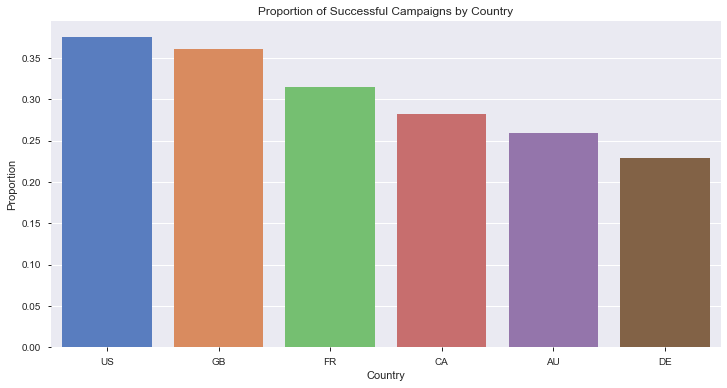

US    0.375744
GB    0.361363
FR    0.314513
CA    0.282686
AU    0.258721
DE    0.228760
Name: country, dtype: float64


In [96]:
#what portion of campaigns in each country were successful?
y = (clean_df['country'].loc[clean_df['country'].isin(['US', 'GB', 'CA', 'AU', 'DE', 'FR',])].loc[clean_df['state'] == 'successful'].value_counts())/(clean_df['country'].loc[clean_df['country'].isin(['US', 'GB', 'CA', 'AU', 'DE', 'FR'])].value_counts())
y = y.sort_values(ascending = False)
fig=plt.figure(figsize=(12,6))
ax = sns.barplot(x = y.index, y = y, order = y.index, palette = 'muted')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.title('Proportion of Successful Campaigns by Country')
plt.show()
print(y)

In [97]:
#group categories by main category and campaign state
grouped = clean_df.groupby(['country','state'])
grouped.size()

country  state     
AT       canceled          91
         failed           378
         successful       107
         suspended          6
AU       canceled        1065
                        ...  
SG       suspended          6
US       canceled       28311
         failed        152061
         successful    109299
         suspended       1216
Length: 90, dtype: int64

### Campaign Backers

All campaigns have an average of 106 backers per campaign. Successful campaigns have an average of 263 backers per campaign. Failed campaigns have an average of 16 backers per campaign.

In [111]:
#average backers per campaign
cbackers = clean_df.backers.mean()
sbackers = success_df.backers.mean()
fbackers = fail_df.backers.mean()
print(cbackers, sbackers, fbackers)

106.91004029008865 263.92136223834694 16.422351923689682


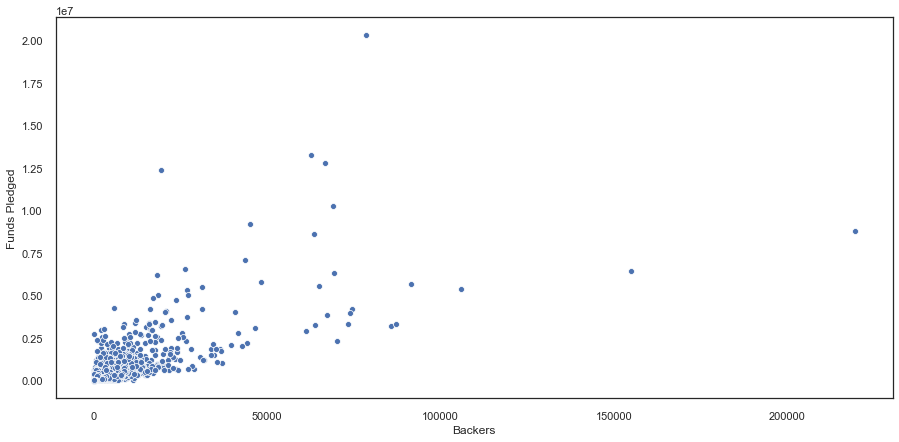

In [110]:
#campaign duration and pledged amounts
cam = pd.to_numeric(clean_df['backers'])
num = pd.to_numeric(clean_df['usd_pledged_real'])
fig, ax = plt.subplots(figsize=(15,7)) # define the axes so we can modify them
sns.scatterplot(cam, num,data=success_df,ax = ax) # tell sns to use ax
ax.set_xlabel('') # turn off title
ax.set_ylabel('') # turn off title
plt.xlabel('Backers')
plt.ylabel('Funds Pledged')
plt.show()

#### Research Question, Hypothesis and Statistics

<b> Research Question </b> : Is there a relationship between the number of backers per campaign and campaign success?
<p>
<b> Hypothesis:</b> There is a statistically significant relationship between the number of backers per campaign and campaign success.

/Users/kellipeluso/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:486: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  **kws)


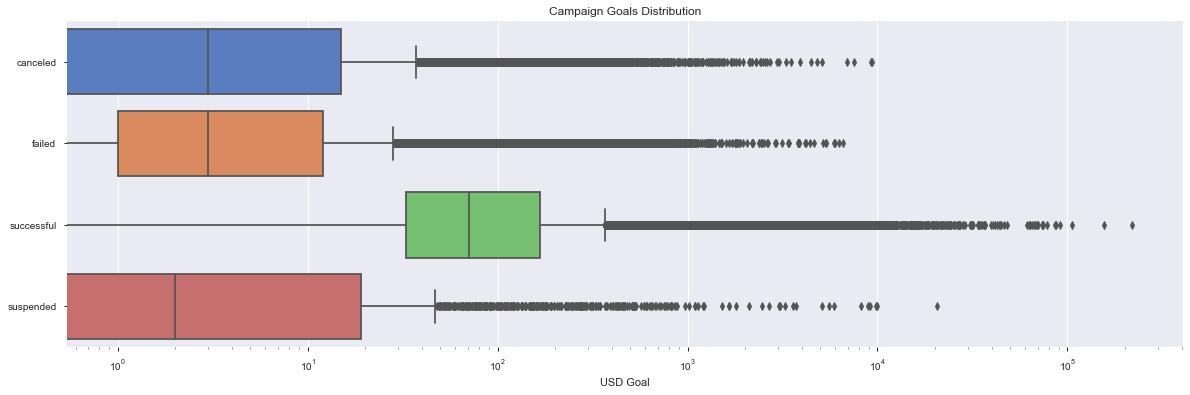

In [101]:
f, ax = plt.subplots(figsize=(20, 6))
ax.set_xscale("log")
sns.boxplot(x="backers", y = 'state', data=clean_df, palette = 'muted')
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel = "USD Goal", title = 'Campaign Goals Distribution')
plt.show()

### Correlations Matrix

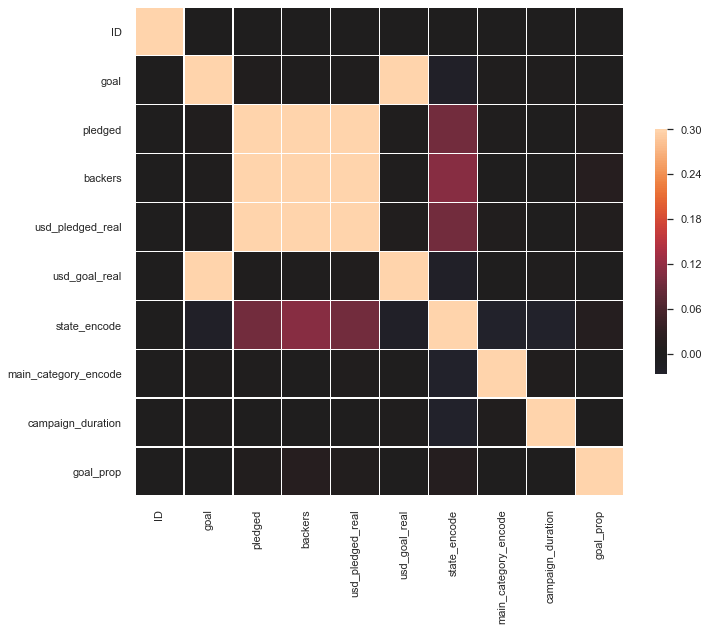

In [109]:
#plot correlation matrix
sns.set(style="white")

# Compute the correlation matrix
corr = clean_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Modeling